## DATA ANALYSIS

16th March

The goal of this notebook is creating a CNN to analyse previously produced data.

### Packages

In [96]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D


## DATA renormalization

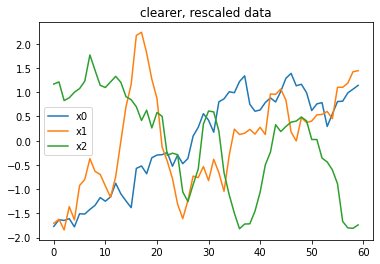

[1. 0. 0.]
10000 8000 2000 60


In [2]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000'
fnamex = 'DATA/x_'+str0+'.csv'
fnamey = 'DATA/y_'+str0+'.csv'

x = np.loadtxt(fnamex, delimiter = ',', dtype = float)
N = len(x)

xm = x.mean(axis = 1)
stdx = x.std(axis = 1)
for n in range(N):
    x[n] -= xm[n]
    x[n] /= stdx[n]
    
plt.plot(x[0], label='x0')
plt.plot(x[1], label='x1')
plt.plot(x[2], label='x2')
plt.title('clearer, rescaled data')
plt.legend()
plt.show()    


categ = np.loadtxt(fnamey, delimiter = ',', dtype = int)
N_categ = np.max(categ)+1
y = np.zeros((N,N_categ))
for n in range(N):
    y[n][categ[n]] = 1             #one-hot encoding
print(y[0])


perc_train = 0.8                    
N_train = int(N*perc_train)
N_val = N - N_train

x_train, y_train = x[:N_train], y[:N_train]
x_val, y_val = x[N_train:], y[N_train:]

L = len(x[0])
print(N,N_train, N_val,L)


x_train = x_train.reshape(x_train.shape[0],L,1)    #reshaping
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

In [3]:
reg = regularizers.l2(0.01)    #LASSO, lambda = 10e-4
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model.add(AveragePooling1D(5))                          #Reduce 5 -> 1

model.add(Conv1D(                                       #Second layer
                filters = 5,
                kernel_size = 7,
                activation = 'relu'
                ))
model.add(Flatten())                                      #Move to GNN
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ,activation = 'softmax'))

print(model.summary())   #Notice how few parameters!

NameError: name 'input_shape' is not defined

In [4]:

opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)

model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

#after a compilation of the network we save in 'initial.h5' the weight at the beginning
model.save_weights('initial.h5')

In [5]:
batch_size = 250
epochs = 100
fit = model.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 2
               )

Epoch 1/100
32/32 - 7s - loss: 1.1038 - accuracy: 0.3298 - val_loss: 1.0968 - val_accuracy: 0.3735
Epoch 2/100
32/32 - 0s - loss: 1.0956 - accuracy: 0.3643 - val_loss: 1.0907 - val_accuracy: 0.4050
Epoch 3/100
32/32 - 0s - loss: 1.0899 - accuracy: 0.3868 - val_loss: 1.0820 - val_accuracy: 0.4130
Epoch 4/100
32/32 - 0s - loss: 1.0801 - accuracy: 0.4135 - val_loss: 1.0668 - val_accuracy: 0.4515
Epoch 5/100
32/32 - 1s - loss: 1.0684 - accuracy: 0.4224 - val_loss: 1.0491 - val_accuracy: 0.4700
Epoch 6/100
32/32 - 0s - loss: 1.0502 - accuracy: 0.4466 - val_loss: 1.0271 - val_accuracy: 0.4885
Epoch 7/100
32/32 - 0s - loss: 1.0329 - accuracy: 0.4596 - val_loss: 1.0055 - val_accuracy: 0.5090
Epoch 8/100
32/32 - 0s - loss: 1.0119 - accuracy: 0.4863 - val_loss: 0.9800 - val_accuracy: 0.5280
Epoch 9/100
32/32 - 0s - loss: 0.9902 - accuracy: 0.4976 - val_loss: 0.9534 - val_accuracy: 0.5450
Epoch 10/100
32/32 - 0s - loss: 0.9681 - accuracy: 0.5182 - val_loss: 0.9344 - val_accuracy: 0.5590
Epoch 11/

32/32 - 0s - loss: 0.6339 - accuracy: 0.7477 - val_loss: 0.6198 - val_accuracy: 0.7545
Epoch 84/100
32/32 - 0s - loss: 0.6281 - accuracy: 0.7484 - val_loss: 0.6203 - val_accuracy: 0.7555
Epoch 85/100
32/32 - 0s - loss: 0.6250 - accuracy: 0.7517 - val_loss: 0.6133 - val_accuracy: 0.7595
Epoch 86/100
32/32 - 0s - loss: 0.6237 - accuracy: 0.7549 - val_loss: 0.6114 - val_accuracy: 0.7625
Epoch 87/100
32/32 - 0s - loss: 0.6173 - accuracy: 0.7575 - val_loss: 0.6142 - val_accuracy: 0.7635
Epoch 88/100
32/32 - 0s - loss: 0.6189 - accuracy: 0.7544 - val_loss: 0.6183 - val_accuracy: 0.7590
Epoch 89/100
32/32 - 0s - loss: 0.6220 - accuracy: 0.7536 - val_loss: 0.6053 - val_accuracy: 0.7615
Epoch 90/100
32/32 - 0s - loss: 0.6164 - accuracy: 0.7594 - val_loss: 0.6026 - val_accuracy: 0.7640
Epoch 91/100
32/32 - 0s - loss: 0.6102 - accuracy: 0.7638 - val_loss: 0.5973 - val_accuracy: 0.7620
Epoch 92/100
32/32 - 0s - loss: 0.6031 - accuracy: 0.7640 - val_loss: 0.5971 - val_accuracy: 0.7635
Epoch 93/100


As we can see now the performance are really better!

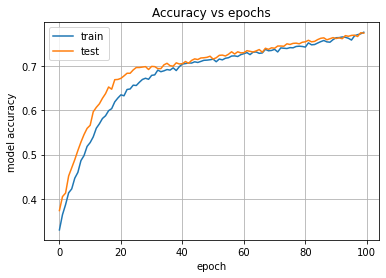

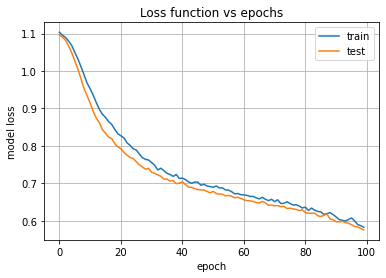

In [6]:
#Plot

# accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()
# loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('Loss function vs epochs')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

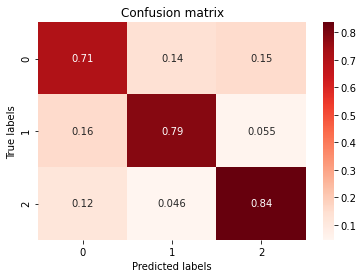

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred_val  = model.predict(x_val)
#take the class with the highest probability from the val predictions
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_val, axis=1)
confusion_Oz = confusion_matrix(max_y_pred_val,max_y_val, normalize='true') 
sns.heatmap(confusion_Oz, annot = True, cmap = plt.cm.Reds, fmt = '.2g')

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion matrix')
plt.show()

100%|██████████| 12/12 [10:07<00:00, 50.59s/it]


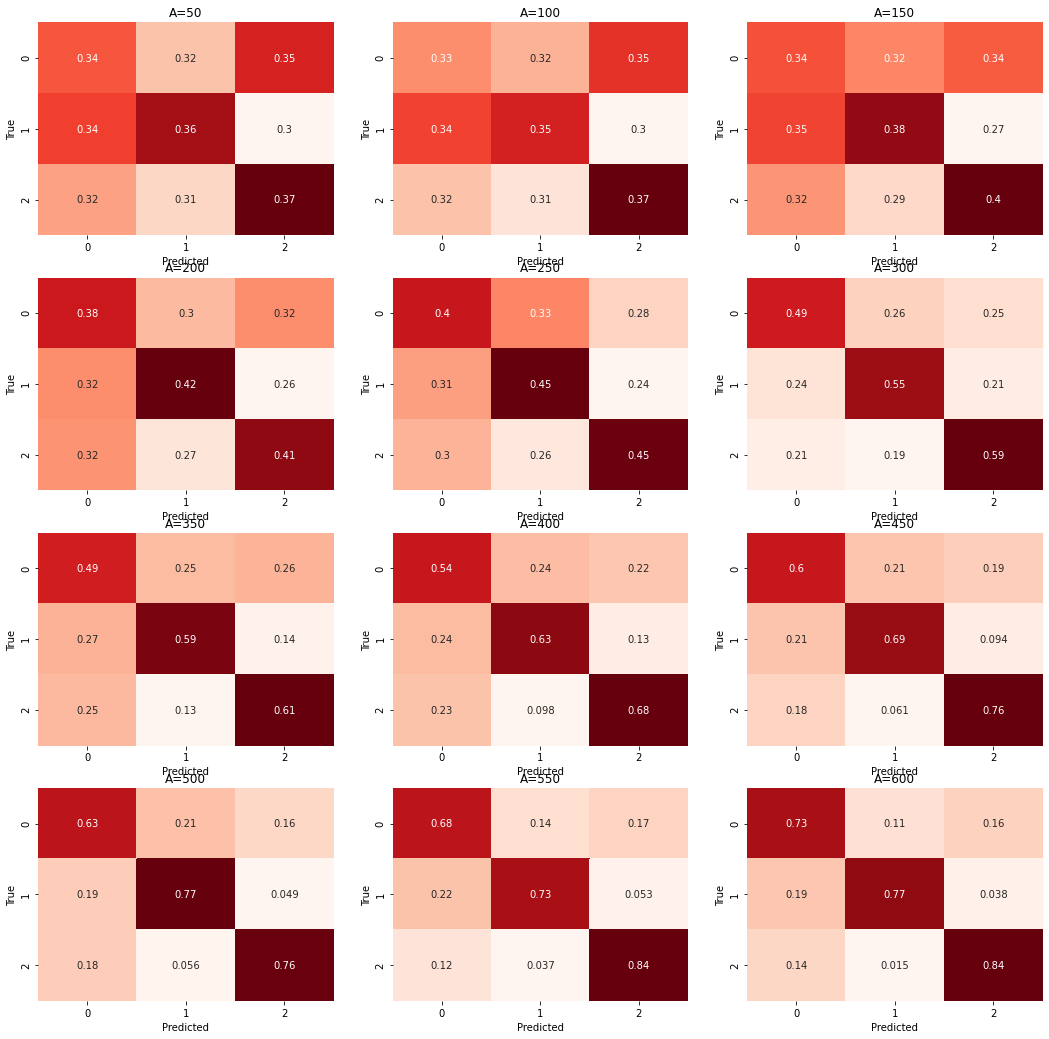

{50: 0.35620625168085096, 100: 0.37803750187158586, 150: 0.3885500028729439, 200: 0.4023687466979027, 250: 0.42791875153779985, 300: 0.526406255364418, 350: 0.5503062516450882, 400: 0.6065437525510788, 450: 0.6663062512874603, 500: 0.7041874945163726, 550: 0.7339374989271163, 600: 0.777581250667572}


In [8]:
from tqdm import tqdm

fig, ax = plt.subplots(4, 3, figsize=(18,18))
As = np.arange(50,650,50)
scores = {}

for a in tqdm(range(len((As)))):
    
    #if statements to define the grid for the subplots
    if a < 3:
        i = 0
        j = a
    elif a < 6:
        i = 1
        j = a-3
    elif a < 9:
        i = 2
        j = a-6
    elif a < 12:
        i = 3
        j = a-9
    elif a < 15:
        i = 4
        j = a-12
    
    str0 = f'ts_L60_Z12_A{As[a]}_DX50_bias5_N10000'
    fnamex = 'DATA/x_'+str0+'.csv'
    fnamey = 'DATA/y_'+str0+'.csv'
    
    x = np.loadtxt(fnamex, delimiter = ',', dtype = float)
    N = len(x)

    xm = x.mean(axis = 1)
    stdx = x.std(axis = 1)
    for n in range(N):
        x[n] -= xm[n]
        x[n] /= stdx[n]

    categ = np.loadtxt(fnamey, delimiter = ',', dtype = int)
    N_categ = np.max(categ)+1
    y = np.zeros((N,N_categ))
    for n in range(N):
        y[n][categ[n]] = 1             

    perc_train = 0.8                    
    N_train = int(N*perc_train)
    N_val = N - N_train

    x_train, y_train = x[:N_train], y[:N_train]
    x_val, y_val = x[N_train:], y[N_train:]

    L = len(x[0])

    x_train = x_train.reshape(x_train.shape[0],L,1)   
    x_val = x_val.reshape(x_val.shape[0],L,1)
    input_shape = (L,1)
    
    #at each step of the for loop we recover the initial weights in order to start always from the same model
    model.load_weights('initial.h5')
    fit = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (x_val,y_val),
                    verbose = 0
                   )
    scores[As[a]] = np.mean(fit.history['accuracy'][-20:])
    
    y_pred_val  = model.predict(x_val)
    max_y_pred_val = np.argmax(y_pred_val, axis=1)
    max_y_val = np.argmax(y_val, axis=1)
    confusion_Oz = confusion_matrix(max_y_pred_val,max_y_val, normalize='true') 
 
    g = sns.heatmap(confusion_Oz,
                    annot = True,
                    cmap = plt.cm.Reds,
                    cbar = False,
                    fmt = '.2g',
                    ax = ax[i][j]
                   )
    g.set_ylabel('True')
    g.set_xlabel('Predicted')
    g.set_title(f'A={As[a]}')

plt.show()

In [58]:
keys_int = []
as_accuracy = []
for k in scores.keys():
    keys_int.append(k)
    as_accuracy.append(scores.get(k))
plt.title('Accuracy vs Signal Amplitude')
plt.xlabel('Signal Amplitude [a.u.]')
plt.xlabel('Accuracy [a.u.]')
plt.plot(keys_int, as_accuracy, '-o')
plt.grid()
plt.show()

NameError: name 'scores' is not defined

#### new data

In [97]:
str1 = 'ts_comp_N10000'
fnamex1 = 'DATA/x_'+str1+'.csv'
fnamey1 = 'DATA/y_'+str1+'.csv'

x = np.loadtxt(fnamex1, delimiter = ',', dtype = float)
categ = np.loadtxt(fnamey1, delimiter = ',', dtype = int)

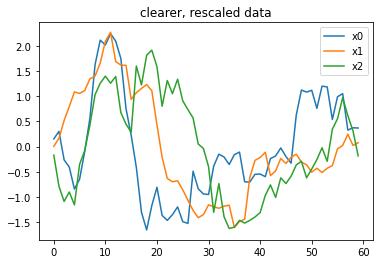

[0. 1. 0.]
Total samples:  10000 
Training samples: 8000 2000 
Test samples: 60


In [98]:
N = len(x)

xm = x.mean(axis = 1)
stdx = x.std(axis = 1)
for n in range(N):
    x[n] -= xm[n]
    x[n] /= stdx[n]
    
plt.plot(x[0], label='x0')
plt.plot(x[1], label='x1')
plt.plot(x[2], label='x2')
plt.title('clearer, rescaled data')
plt.legend()
plt.show()    

N_categ = np.max(categ)+1
y = np.zeros((N,N_categ))
for n in range(N):
    y[n][categ[n]] = 1             #one-hot encoding
print(y[0])


perc_train = 0.8                    
N_train = int(N*perc_train)
N_val = N - N_train

x_train, y_train = x[:N_train], y[:N_train]
x_val, y_val = x[N_train:], y[N_train:]

L = len(x[0])
print('Total samples: ', N, '\nTraining samples:',N_train, N_val, '\nTest samples:',L)


x_train = x_train.reshape(x_train.shape[0],L,1)    #reshaping
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)


### keeping just one Conv1d, adding dense

In [ ]:
reg = regularizers.l2(0.01)    #LASSO, lambda = 10e-4
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

batch_size = 250
epochs = 250

In [135]:
model1 = Sequential()
model1.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model1.add(AveragePooling1D(10))                          #Reduce 5 -> 1
model1.add(Flatten())                                     #Move to GNN

model1.add(Dense(9,activation = 'relu'))

model1.add(Dropout(0.1))
model1.add(Dense(N_categ,activation = 'softmax'))

print(model1.summary()) 
model1.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

fit1 = model1.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 0
               )

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_53 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_51 (Averag (None, 5, 5)              0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 25)                0         
_________________________________________________________________
dense_178 (Dense)            (None, 9)                 234       
_________________________________________________________________
dropout_48 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_179 (Dense)            (None, 3)                 30        
Total params: 324
Trainable params: 324
Non-trainable params: 0
_______________________________________________________

In [136]:
model2 = Sequential()
model2.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model2.add(AveragePooling1D(10))                          #Reduce 5 -> 1
model2.add(Flatten())                                     #Move to GNN
model2.add(Dense(9,activation = 'relu'))
model2.add(Dense(6,activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(N_categ,activation = 'softmax'))

print(model2.summary()) 
model2.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

fit2 = model2.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 0
               )

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_54 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_52 (Averag (None, 5, 5)              0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 25)                0         
_________________________________________________________________
dense_180 (Dense)            (None, 9)                 234       
_________________________________________________________________
dense_181 (Dense)            (None, 6)                 60        
_________________________________________________________________
dropout_49 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_182 (Dense)            (None, 3)               

In [137]:
model3 = Sequential()
model3.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))
model3.add(AveragePooling1D(10))                          #Reduce 5 -> 1
model3.add(Flatten())                                     #Move to GNN
model3.add(Dense(9,activation = 'relu'))
model3.add(Dense(6,activation = 'relu'))
model3.add(Dense(3,activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(Dense(N_categ,activation = 'softmax'))

print(model3.summary()) 

model3.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

fit3 = model3.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 0
               )

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_53 (Averag (None, 5, 5)              0         
_________________________________________________________________
flatten_54 (Flatten)         (None, 25)                0         
_________________________________________________________________
dense_183 (Dense)            (None, 9)                 234       
_________________________________________________________________
dense_184 (Dense)            (None, 6)                 60        
_________________________________________________________________
dense_185 (Dense)            (None, 3)                 21        
_________________________________________________________________
dropout_50 (Dropout)         (None, 3)               

In [138]:
model4 = Sequential()
model4.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                )
          )
model4.add(AveragePooling1D(10))                          #Reduce 5 -> 1
model4.add(Flatten())                                     #Move to GNN
model4.add(Dense(9,activation = 'relu'))
model4.add(Dense(6,activation = 'relu'))
model4.add(Dense(3,activation = 'relu'))
#model4.add(Dense(3,activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(N_categ,activation = 'softmax'))

print(model4.summary()) 

model4.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])

fit4 = model4.fit(x_train,
                  y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data = (x_val,y_val),
                  verbose = 0
                   )

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_56 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_54 (Averag (None, 5, 5)              0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 25)                0         
_________________________________________________________________
dense_187 (Dense)            (None, 9)                 234       
_________________________________________________________________
dense_188 (Dense)            (None, 6)                 60        
_________________________________________________________________
dense_189 (Dense)            (None, 3)                 21        
_________________________________________________________________
dropout_51 (Dropout)         (None, 3)               

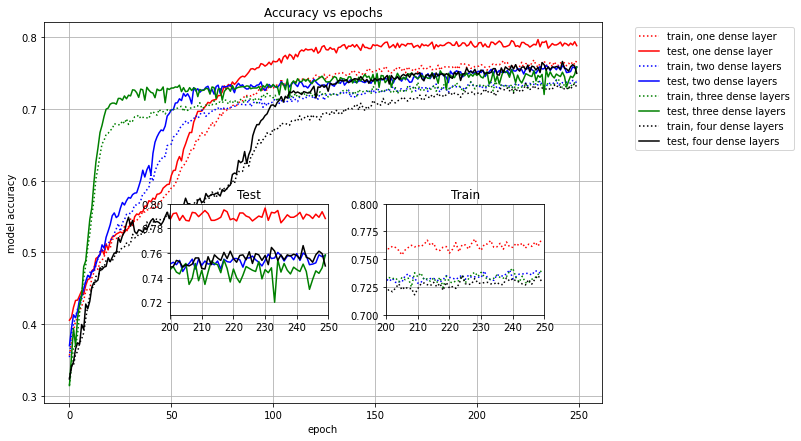

In [145]:
plt.figure(figsize=(10,7))

plt.plot(fit1.history['accuracy'], label='train, one dense layer', c='r', ls='dotted')
plt.plot(fit1.history['val_accuracy'], label='test, one dense layer', c='r')
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid()

plt.plot(fit2.history['accuracy'], label='train, two dense layers', c='b', ls='dotted')
plt.plot(fit2.history['val_accuracy'], label='test, two dense layers', c='b')
plt.ylabel('model accuracy')
plt.xlabel('epoch')

plt.plot(fit3.history['accuracy'], label='train, three dense layers', c='g', ls='dotted')
plt.plot(fit3.history['val_accuracy'], label='test, three dense layers', c='g')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(bbox_to_anchor=(1.05, 1))

plt.plot(fit4.history['accuracy'], label='train, four dense layers', c='black', ls='dotted')
plt.plot(fit4.history['val_accuracy'], label='test, four dense layers', c='black')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(bbox_to_anchor=(1.05, 1))

# test additional axes
a = plt.axes([.3, .3, .22, .22])
plt.plot(fit1.history['val_accuracy'], label='test, one dense layers', c='r')
plt.plot(fit2.history['val_accuracy'], label='test, two dense layers', c='b')
plt.plot(fit3.history['val_accuracy'], label='test, three dense layers', c='g')
plt.plot(fit4.history['val_accuracy'], label='test, four dense layers', c='black')
plt.title('Test')
plt.xlim(200,250)
plt.ylim(0.71,0.8)
plt.grid()

# train additional axes
a = plt.axes([.6, .3, .22, .22])
plt.plot(fit1.history['accuracy'], label='train, one dense layers', c='r', ls='dotted')
plt.plot(fit2.history['accuracy'], label='train, two dense layers', c='b', ls='dotted')
plt.plot(fit3.history['accuracy'], label='train, three dense layers', c='g', ls='dotted')
plt.plot(fit4.history['accuracy'], label='train, four dense layers', c='black', ls='dotted')
plt.title('Train')
plt.xlim(200,250)
plt.ylim(0.7,0.8)

plt.grid()
plt.show()

Se ogni dense layer è un classificatore lineare, aggiungere classificatori lineari a classificatori lineari è forse poco sensato.

'Ci prepariamo ad avere 3 output'. Con 10 layer continui continui a rimescolare la stessa informazione. Quindi facciamo 10. 10,7. 10,7,5. 10,7,5,3. 

Primo layer: separatore lineare: se un solo filtro ho 10 modelli che fanno sep lineare su un solo filtro. In quanti modi diversi separazine lineare su 5 dati (?). Se ho un campione più grande ecco che separazione lineare migliore. 

Più di due categorie: one vs one, one vs all. One vs all? Con 3 categorie la cosa più comonda numero di neuroni in un layer multiplo di 3? proviamo

Con numero dispari di Dense meglio, con un numero pari peggio

Proviamo a mettere a 9. 9,7. 9,7,5. 9,7,5,3. Ovvero mettere un numero multiplo di N_categ. 2 dense, 3 dense e 4 dense ora si overlappano come performance e va sopra a tutti quello con 1. A livello di train sono praticamente uguali.

Proviamo a mettere a 9. 9,6. 9,6,3. 9,6,3,3. Scheramata 15:56


Proviamo a togliere il dropout. Schermata 16:00. Siamo abbastanza convinti nel dire che basta solamente un dense layer perché è quello che mediamente ha performato meglio di tutti.

Proviamo a mettere il dropour a 0.1.  Qui le cose vanno decisamente meglio che se non 0.2

Proviamo con il dropout a 0.2 dopo il flatten. 

Proviamo a cambiare su model 1 le activation functions in tanh e elu e peggiora.

### adding conv1d

In [18]:
model = Sequential()
model.add(Conv1D(                                       #First layer:
                filters = 5,
                kernel_size = 11,                       #like Z = 12
                kernel_regularizer = reg,
                kernel_initializer = ini,
                activation = 'relu',
                input_shape = input_shape
                ))

model.add(AveragePooling1D(5)) #Reduce 5 -> 1

model.add(Conv1D(filters=5, kernel_size=7, activation=
                'relu'))

model.add(Flatten())                                     #Move to GNN
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ,activation = 'softmax'))

print(model.summary()) 


model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
              optimizer = 'adam', metrics = ['accuracy'])


fit = model.fit(x_train,
                y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data = (x_val,y_val),
                verbose = 0
               )


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_6 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten_6 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

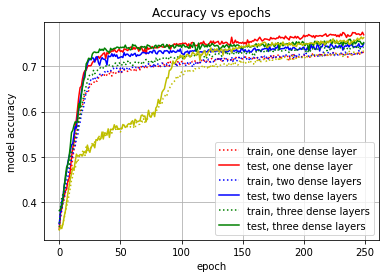

In [19]:
plt.plot(fit1.history['accuracy'], label='train, one dense layer', c='r', ls='dotted')
plt.plot(fit1.history['val_accuracy'], label='test, one dense layer', c='r')
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid()

plt.plot(fit2.history['accuracy'], label='train, two dense layers', c='b', ls='dotted')
plt.plot(fit2.history['val_accuracy'], label='test, two dense layers', c='b')
plt.ylabel('model accuracy')
plt.xlabel('epoch')



plt.plot(fit3.history['accuracy'], label='train, three dense layers', c='g', ls='dotted')
plt.plot(fit3.history['val_accuracy'], label='test, three dense layers', c='g')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()

plt.plot(fit.history['accuracy'], label='train, one dense layer', c='y', ls='dotted')
plt.plot(fit.history['val_accuracy'], label='test, one dense layer', c='y')
plt.title('Accuracy vs epochs')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid()
plt.show()


In [20]:
!mkdir MODEL
fname ='MODEL/model'+str0+'.h5'
model.save(fname, save_format='h5')

model2 = keras.models.load_model(fname)
yhat_val = np.argmax(model2.predict(x_val), axis=-1)
ytrue_val = np.argmax(y_val, axis=-1)

for n in range(20):
    print(y_val[n], ytrue_val[n], yhat_val[n])

NameError: name 'str0' is not defined